<a href="https://colab.research.google.com/github/Sanat1427/100ML/blob/main/cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of cells detected: 16


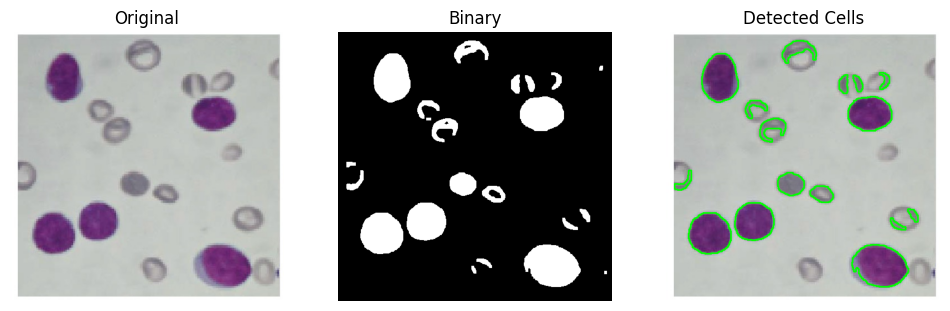

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("blood cell.jpeg")


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


blur = cv2.GaussianBlur(gray, (5, 5), 0)


_, binary = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)


kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

contours, _ = cv2.findContours(
    opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

cell_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 200:
        cell_contours.append(cnt)


output = img.copy()
cv2.drawContours(output, cell_contours, -1, (0, 255, 0), 2)


cell_count = len(cell_contours)
print("Number of cells detected:", cell_count)


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Binary")
plt.imshow(opening, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Detected Cells")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


Number of purple cells detected: 5


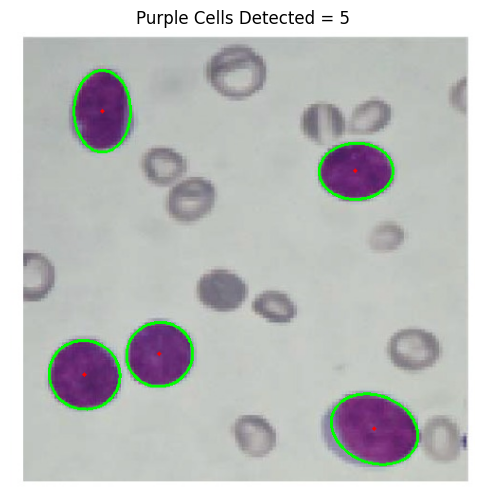

Number of purple cells detected: 5


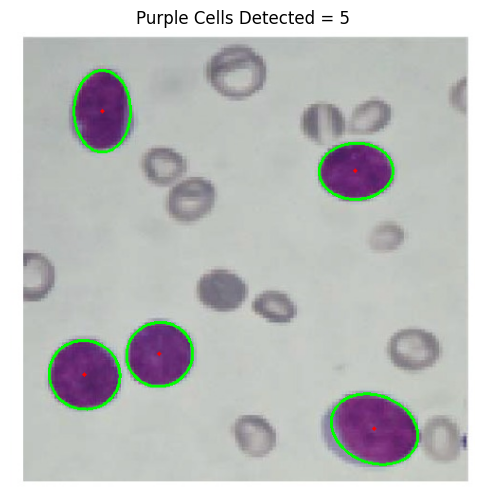

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("blood cell.jpeg")

if img is None:
    print("Error: Could not load the image.")
    exit()

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read image
img = cv2.imread("blood cell.jpeg")

if img is None:
    print("Error: Could not load the image.")
    exit()

# 2. Convert to HSV (color-based detection)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. Define purple color range
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])

mask = cv2.inRange(hsv, lower_purple, upper_purple)

# 4. Morphological cleanup (same as before, good step)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# 🔴 CHANGE 1: Find contours instead of Hough
contours, _ = cv2.findContours(
    mask,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

output = img.copy()
count = 0

# 🔴 CHANGE 2: Filter contours and fit ellipse
for cnt in contours:
    area = cv2.contourArea(cnt)

    # Area filter to remove noise
    if area > 300:   # you can slightly tune this
        if len(cnt) >= 5:  # required for ellipse fitting
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(output, ellipse, (0, 255, 0), 2)

            # draw center
            (cx, cy), _, _ = ellipse
            cv2.circle(output, (int(cx), int(cy)), 2, (0, 0, 255), -1)

            count += 1

print("Number of purple cells detected:", count)

# 8. Display result
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title(f"Purple Cells Detected = {count}")
plt.axis("off")
plt.show()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. Define purple color range
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])

mask = cv2.inRange(hsv, lower_purple, upper_purple)

# 4. Morphological cleanup (same as before, good step)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

#  Find contours instead of Hough
contours, _ = cv2.findContours(
    mask,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

output = img.copy()
count = 0

# Filter contours and fit ellipse
for cnt in contours:
    area = cv2.contourArea(cnt)

    # Area filter to remove noise
    if area > 300:   # you can slightly tune this
        if len(cnt) >= 5:  # required for ellipse fitting
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(output, ellipse, (0, 255, 0), 2)

            # draw center
            (cx, cy), _, _ = ellipse
            cv2.circle(output, (int(cx), int(cy)), 2, (0, 0, 255), -1)

            count += 1

print("Number of purple cells detected:", count)

# 8. Display result
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title(f"Purple Cells Detected = {count}")
plt.axis("off")
plt.show()

In [2]:
import math

# Re-using 'contours' and other variables from the previous cell's execution context

print("Calculating properties for detected purple cells:")
cell_properties = []
cell_idx = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    # Apply the same area and contour length filter as in the previous cell (QHD7o_CgM00w)
    if area > 300 and len(cnt) >= 5:
        perimeter = cv2.arcLength(cnt, True)
        if perimeter > 0:
            # Roundness/Form Factor: (4 * pi * Area) / (Perimeter^2)
            roundness = (4 * math.pi * area) / (perimeter * perimeter)
        else:
            roundness = 0.0 # Handle cases with zero perimeter

        cell_properties.append({
            "cell_id": cell_idx,
            "area": area,
            "perimeter": perimeter,
            "roundness": roundness
        })
        print(f"\nCell {cell_idx+1}:")
        print(f"  Area: {area:.2f}")
        print(f"  Perimeter: {perimeter:.2f}")
        print(f"  Roundness/Form Factor: {roundness:.4f}")
        cell_idx += 1

if not cell_properties:
    print("No cells found with the specified criteria to calculate properties.")

Calculating properties for detected purple cells:

Cell 1:
  Area: 5237.50
  Perimeter: 288.55
  Roundness/Form Factor: 0.7905

Cell 2:
  Area: 4221.00
  Perimeter: 249.82
  Roundness/Form Factor: 0.8499

Cell 3:
  Area: 3666.50
  Perimeter: 227.58
  Roundness/Form Factor: 0.8896

Cell 4:
  Area: 3584.50
  Perimeter: 232.75
  Roundness/Form Factor: 0.8315

Cell 5:
  Area: 3974.50
  Perimeter: 247.58
  Roundness/Form Factor: 0.8148
